# **Project Name**  -   **Bike Sharing Demand Prediction**

##### **Project Type**    - Regression
##### **Contribution**    - Individual


**BUSINESS PROBLEM OVERVIEW**

The introduction of rental bikes in urban cities has significantly improved mobility comfort by offering a convenient and environmentally friendly transportation option. However, ensuring that rental bikes are available and accessible at the right times is crucial to minimizing waiting times and meeting demand effectively. This is vital for maintaining a stable supply of rental bikes and enhancing user satisfaction.

Accurately predicting the hourly demand for rental bikes is a major challenge. A precise forecast allows for better planning and distribution of bikes, ensuring that they are available where and when needed. This not only reduces operational inefficiencies but also boosts user satisfaction and overall service reliability.

The objective of this project is to analyze bike-sharing data to identify patterns and factors that influence bike usage. Through exploratory data analysis (EDA) and the development of predictive models, the goal is to forecast the number of rental bikes required at each hour. This will enable city planners and bike-sharing companies to optimize bike distribution, improve resource allocation, and provide a seamless and efficient bike-sharing experience to the public.

# **GitHub Link -**

https://github.com/BholaySingh23/Bike-Sharing-Demand-Prediction

## ***1. Know Your Data***

### Import Libraries

In [215]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


###   Dataset Loading

In [216]:
#Importing The Dataset
dataset = pd.read_csv('/content/SeoulBikeData.csv',encoding='latin1')

### Dataset First View

In [217]:
#Dataset First
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns Count

In [218]:
#Dataset rows & columns
dataset.shape

(8760, 14)

### Dataset Info

In [219]:
#Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [220]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null values

In [221]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


<Axes: >

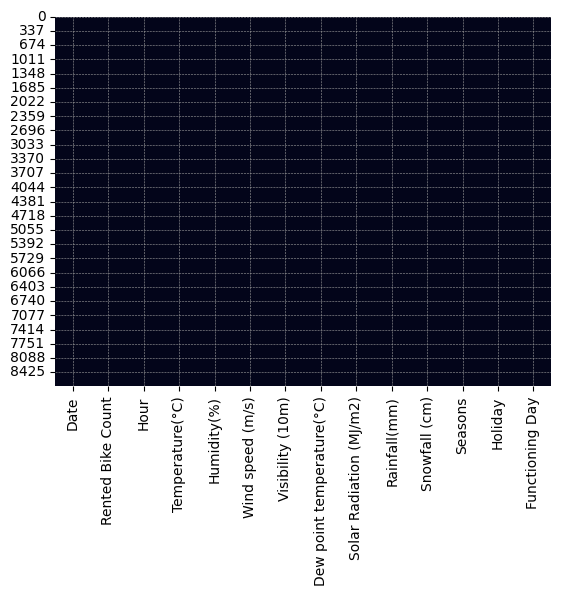

In [222]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

 The heatmap is black, which means that there are no missing values in the dataset. This is good news because the dataset appears to be well-maintained, with no missing values, which is a good sign for data quality.

## ***2. Understanding Your Variables***

In [223]:
# Dataset Describe
dataset.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [224]:
# Dataset Columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Variables Description

* Date                : Date of the data collected

* Rented Bike Count       : Number of Bikes rented on that day

* Hour : Number of hours for which the bikes are rented

* Temperature(°C) : Temperature of that particular day in degree Celcius

* Humidity(%) : The percentage of humidity on that particular day

* Wind speed (m/s) : Wind speed on that particular day

* Visibility (10m) : Visibility in meters

* Dew point temperature(°C) : Temperature at which dew will fall in degree celcius

* Solar Radiation (MJ/m2) : Solar Radiation on that particular day in the city of Seoul

* Rainfall(mm) : Rainfall in mm in the city of Seoul

* Snowfall (cm) : Snowfall in cms in the city of Seoul

* Seasons : What type of season is there in Seoul(Categorical column)

* Holiday : Whether the day is holiday or not (Categorical column)

* Functioning Day : Whether the day is Functioning day or not (Categorical column)

## ***3. Data Wrangling***

### Null value check in the dataframe

In [225]:
df=dataset.copy()

#check for null values in the dataframe
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### Checking for outliers by using 2 Methods:

* Z Score method
* Inter Quartile Range(IQR) method

In [226]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols = list(numerical_cols)
numerical_cols = numerical_cols[1:]

In [227]:
#user defined method to treat the outliers in the column by using the IQR method
def out(data):
    sorted (data)
    q1,q3= np.percentile(data, [25,75])
    iqr= q3-q1
    lb = q1 -(1.5 * iqr)
    ub = q3 +(1.5 * iqr)
    data[data > ub] = ub
    data[data < lb] = lb
    return (data)

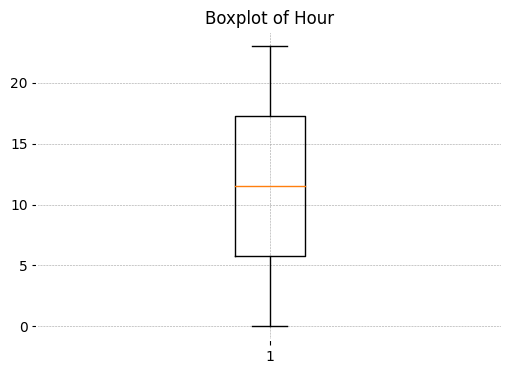

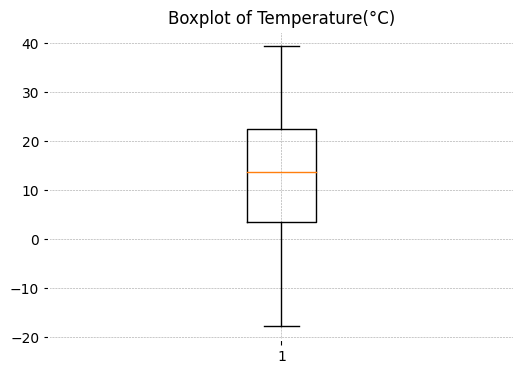

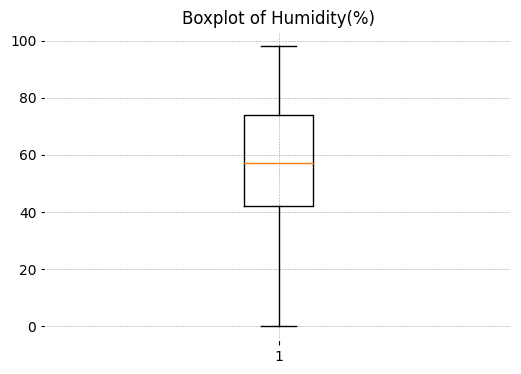

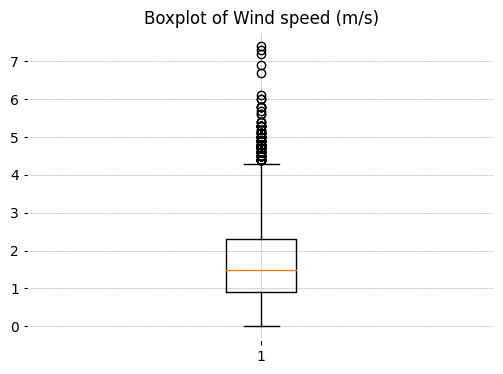

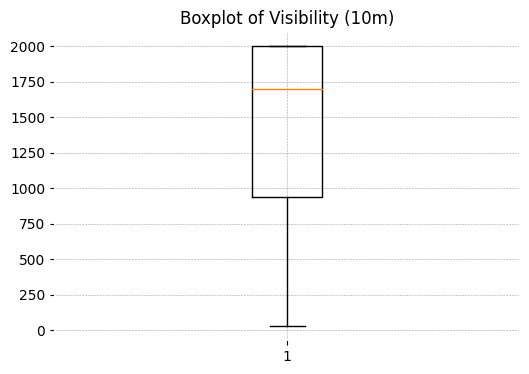

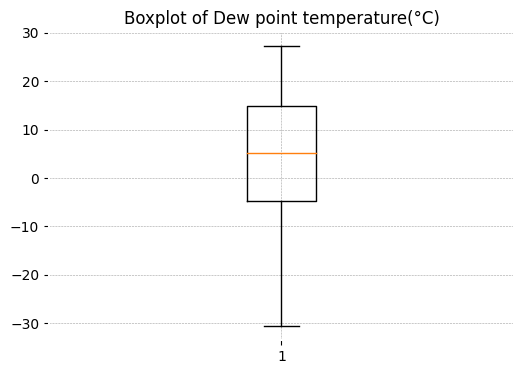

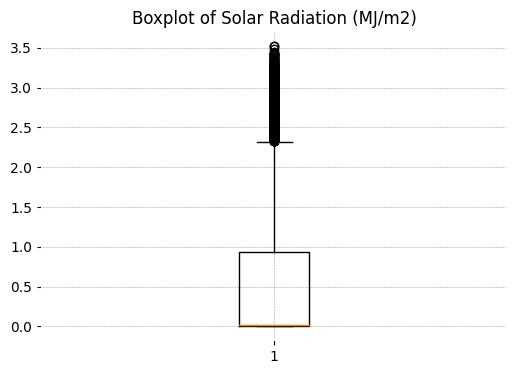

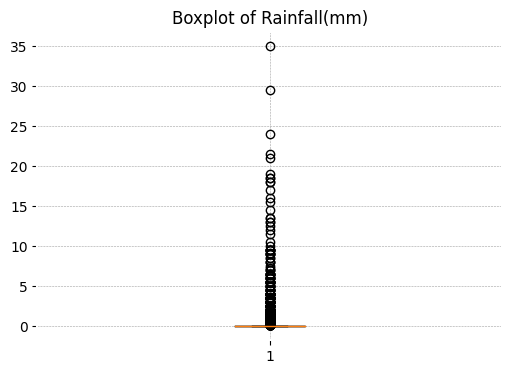

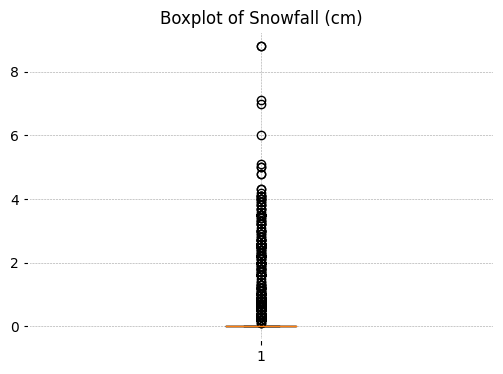

In [228]:
for column in numerical_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[column])
    plt.title('Boxplot of ' + column)
    plt.show()

### What all manipulations have been done and insights found?

In the context of the Seoul bike sharing demand dataset, the numerical columns are crucial predictors influencing the target column, which represents bike sharing demand. However, handling outliers in these columns might introduce bias, potentially skewing the predictive model's performance. Outliers often signify extreme or rare occurrences that could still be relevant to the prediction task.

For instance, if we adjust outliers by setting them to the upper or lower bound using methods like out(), it could distort the distribution of the data and lead to inaccurate predictions.

In [229]:
type(df['Date'][0])

str

In [230]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [231]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

## ***4. Data Visualisation***

#### Chart - 1




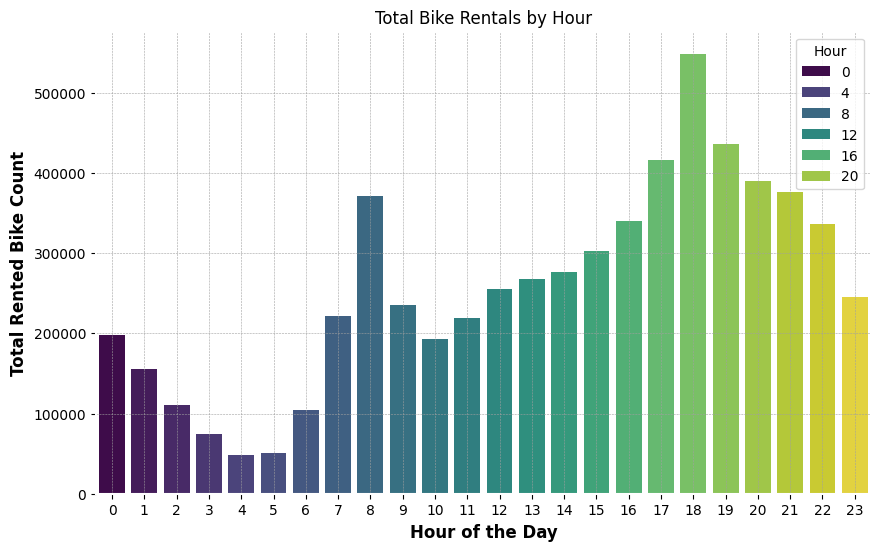

In [232]:
# Aggregate the data by hour to count the number of bike rentals
hourly_rentals = df.groupby('Hour')['Rented Bike Count'].sum().reset_index()

# Plot the bar plot for the 'Hour' column
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Rented Bike Count', data=hourly_rentals,hue='Hour',palette='viridis')
plt.title('Total Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rented Bike Count')
plt.grid(True)
plt.show()

##### 1. Why did i pick the specific chart?

The bar plot is an ideal choice because it effectively visualizes the distribution of bike rentals across different hours of the day. The height of each bar directly represents the total rental count, making it easy to compare activity levels across different time periods.

##### 2. What is/are the insight(s) found from the chart?

* Peak Demand: The chart clearly shows a significant peak in bike rentals between 17:00 and 19:00 (5 PM to 7 PM). This suggests a high demand for bike rentals during the evening hours.
* Morning vs. Evening: There's a noticeable disparity in rentals between the morning hours and the afternoon/evening hours. This pattern suggests that the service is more popular for leisure or evening activities than for commutes or errands.
* Consistent Demand: Rentals remain relatively high throughout the day, indicating consistent demand for bike rentals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

* Staffing and Operations: Understanding the peak demand hours allows the company to optimize staffing and resource allocation. For example, they could:
      * Have more staff on hand during the peak period to handle rentals and address customer needs.
      * Ensure adequate bike availability during peak hours to prevent shortages.
* Marketing & Promotions: Targeted marketing campaigns could be launched during the peak demand hours to maximize revenue and reach potential customers actively looking for bike rental services.
* Location Strategy: Data from the chart could influence decisions about expanding service locations or adjusting hours of operation. Locations with high demand during peak hours could be prioritized.


**Potential Negative Growth:**

* High Peak Demand Leading to Strain: If the company is unable to scale its resources adequately during peak hours, it could lead to:
       * Long wait times for rentals.
       * Customer dissatisfaction.
       * Negative online reviews.

* Limited Capacity: If the company has limited bikes available, this could limit potential revenue during peak demand hours.

**To mitigate negative growth, the company should:**

* Invest in additional bikes: Increase their fleet size to meet peak demand and avoid shortages.
* Consider flexible pricing: Introduce surge pricing during peak hours to manage demand and maximize revenue.
* Improve online booking system: Enhance their online booking platform to allow customers to reserve bikes in advance, especially during peak hours.
* Promote off-peak rentals: Offer discounts or promotions during lower demand periods to encourage people to try the service outside of peak hours.

##Overall, the insights gained from the chart are valuable for making data-driven decisions that improve business performance and customer satisfaction.







#### Chart - 2


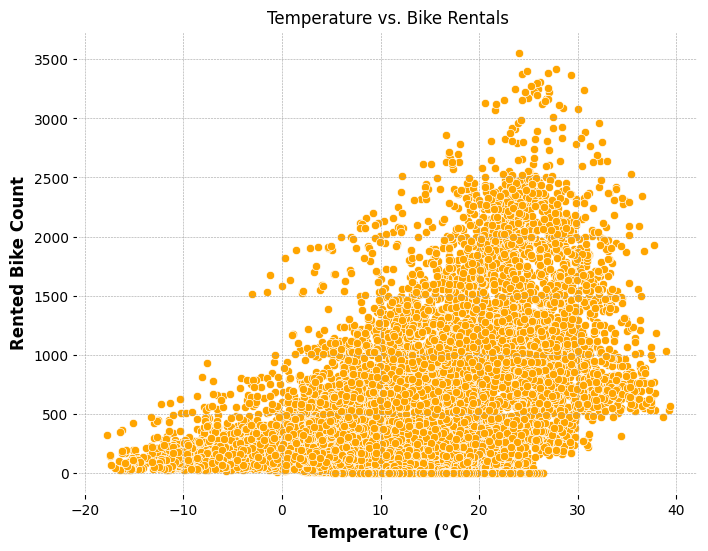

In [233]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=df, color='orange')
plt.title('Temperature vs. Bike Rentals')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

##### 1. Why did i pick the specific chart?

The scatter plot shows the relationship between temperature and rented bike count. The x-axis represents temperature in Celsius, and the y-axis represents the number of bikes rented. Each point on the scatter plot represents a day's data.

##### 2. What is/are the insight(s) found from the chart?

* Positive Correlation: The chart shows a positive correlation between temperature and rented bike count. This means that as the temperature increases, the number of bikes rented also tends to increase.

* Linear Relationship: The relationship between temperature and rented bike count appears to be somewhat linear.

* Outliers: There are a few outliers, which are points that are far away from the general trend. These outliers could represent days with unusual weather conditions, special events, or other factors that influenced bike rentals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Growth: The insights from the scatter plot can help bike rental companies to better plan their operations. For example, they can increase their inventory of bikes during the warmer months when demand is likely to be higher.

Marketing Strategies: They can also use this information to target their marketing efforts more effectively, such as offering promotions during periods of high demand.

Staffing: This information could be used to adjust staffing levels during different seasons of the year.

Negative Growth: If the bike rental company does not prepare for the increased demand during warmer months, it could result in lost revenue. This could happen if they run out of bikes or are unable to provide timely service.

#### Chart - 3

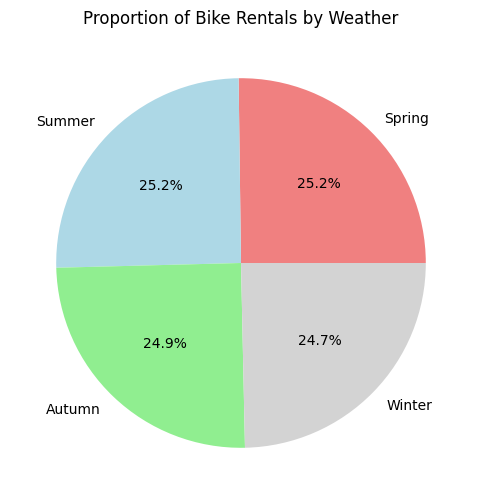

In [234]:
# Pie Chart
weather_counts = df['Seasons'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'lightgrey'])
plt.title('Proportion of Bike Rentals by Weather')
plt.show()

In [235]:
df['Seasons'].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

##### 1. Why did i pick the specific chart?

A pie chart is an excellent choice here because it clearly shows the relative proportion of bike rentals in each season. It's easy to visually compare the size of each slice to understand which seasons have the most rentals.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a relatively even distribution of bike rentals across the four seasons. This suggests that while some seasons might be slightly more popular than others, there's no overwhelming preference for any particular time of year.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the pie chart provide valuable information for decision-making in a bike rental business. The company can leverage these insights to optimize marketing, inventory, and staffing, ensuring a positive business impact, while also remaining aware of potential challenges like competition and weather variability.

#### Chart - 4

<ipython-input-236-c49b40fd63f0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Week_Number', y='Rented Bike Count', data=weekly_rentals, palette='viridis')


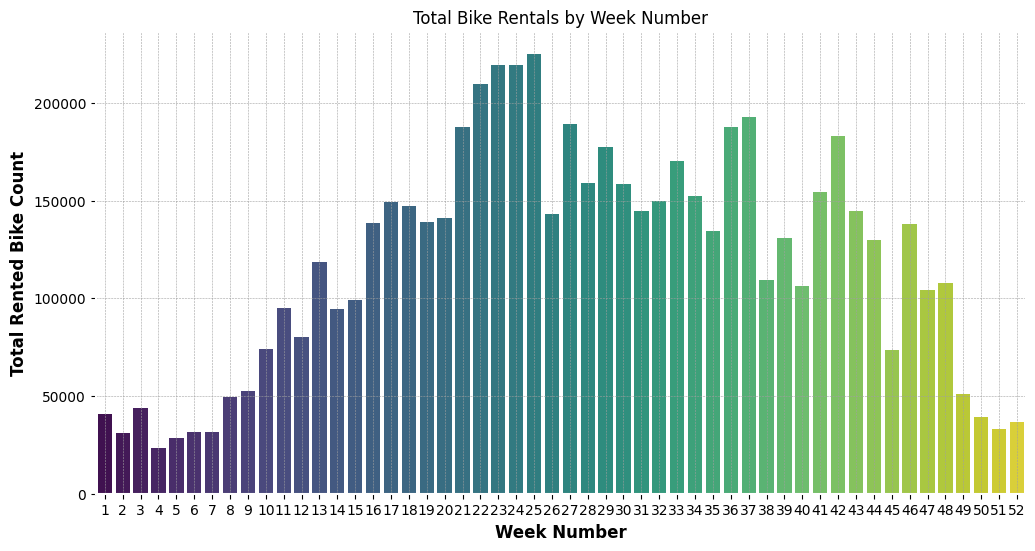

In [236]:
# Extract the week number from the date
df['Week_Number'] = df['Date'].dt.isocalendar().week

# Aggregate the data by week number to sum the rented bike counts
weekly_rentals = df.groupby('Week_Number')['Rented Bike Count'].sum().reset_index()

# Plot the bar plot for the total bike rentals across week numbers
plt.figure(figsize=(12, 6))
sns.barplot(x='Week_Number', y='Rented Bike Count', data=weekly_rentals, palette='viridis')
plt.title('Total Bike Rentals by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Total Rented Bike Count')
plt.grid(True)
plt.show()

##### 1. Why did i pick the specific chart?

A bar chart is an excellent choice to visualize this data because:

* Clear Comparison: It allows for a direct comparison of total bike rentals across different weeks.
* Discrete Categories: Week numbers are discrete categories (1, 2, 3, etc.) making a bar chart suitable for representing them.
* Trend Identification: It's easy to visually identify trends, like peaks and valleys in rentals.

##### 2. What is/are the insight(s) found from the chart?

* Seasonality: A clear seasonal pattern emerges. Bike rentals are significantly higher during the warmer months (likely spring and summer) and lower during the colder months.

* Peak Weeks: Several weeks exhibit notably high rentals, suggesting specific periods with high demand. This could be due to events, holidays, or favorable weather conditions.

* Low Weeks: The chart also reveals weeks with consistently low rentals. This could be due to unfavorable weather, off-season periods, or a lack of marketing campaigns during those weeks.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Marketing & Promotions: Identify peak weeks and plan targeted marketing campaigns or promotions during those periods to capitalize on high demand.

* Fleet Management: Anticipate rental fluctuations based on seasonal trends. Optimize fleet size to avoid shortages during peak periods and reduce unnecessary expenses during low periods.

* Pricing Strategies: Adjust rental prices based on demand. You could potentially charge a premium during peak weeks and offer discounts during low-demand weeks.

* Weather Fluctuations: Extreme weather conditions (like unexpected heat waves, heavy rain, or snow) could significantly impact rentals during otherwise high-demand periods. This needs to be factored into planning.

* Competition: New bike rental services or changes in competitors' strategies could affect overall demand. Constant market monitoring is necessary.

* Economic Downturns: A decline in overall economic activity could lead to reduced spending on leisure activities like bike rentals. This could necessitate cost-cutting measures or innovative offerings to maintain revenue.

#### Chart - 5

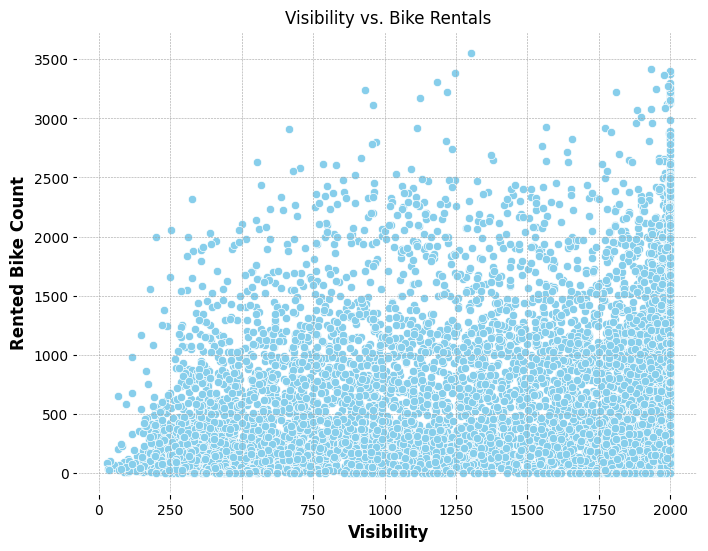

In [237]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Visibility (10m)', y='Rented Bike Count', data=df, color='skyblue')
plt.title('Visibility vs. Bike Rentals')
plt.xlabel('Visibility')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

##### 1. Why did i pick the specific chart?

picked a scatter plot because it's the most appropriate way to visualize the relationship between two continuous variables: Visibility and Rented Bike Count.

##### 2. What is/are the insight(s) found from the chart?

it's hard to discern a clear, strong correlation between visibility and bike rentals. Here's what we can observe:

 * No Strong Linear Relationship
 * Possible Weak Positive Trend
 * Wide Range of Rentals

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The data suggests that visibility might play a role in bike rentals, but it's not a primary driver. The company should consider other factors and implement strategies that address them effectively to increase rental numbers.

#### Chart - 6

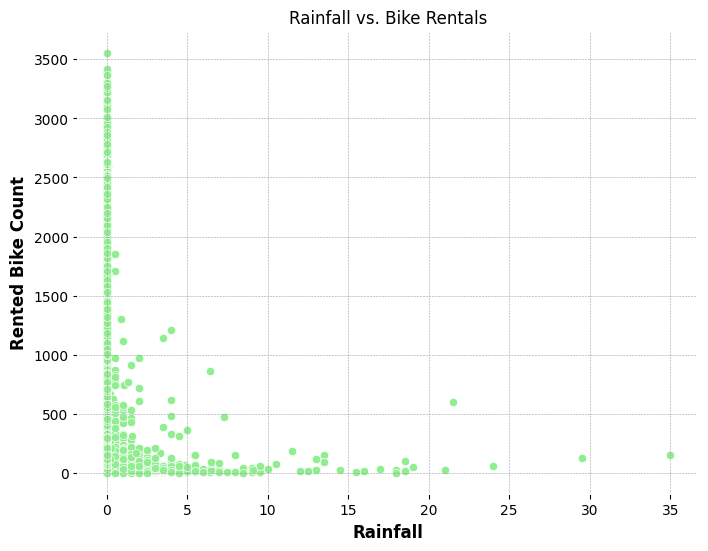

In [238]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rainfall(mm)', y='Rented Bike Count', data=df, color='lightgreen')
plt.title('Rainfall vs. Bike Rentals')
plt.xlabel('Rainfall')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

##### 1. Why did i pick the specific chart?

 Its is the ideal choice for visualizing the relationship between two continuous variables, in this case, rainfall and rented bike count. It allows us to:
  * Identify Trends
  * Spot Outliers

##### 2. What is/are the insight(s) found from the chart?

* **Strong Negative Correlation:** The scatter plot clearly shows a strong negative correlation between rainfall and bike rentals. As rainfall increases, the number of bike rentals significantly decreases.

* **Cluster at Low Rainfall:** A large cluster of data points appears at low rainfall levels, indicating a high number of bike rentals during drier days.

* **Sparse Data at Higher Rainfall:** As rainfall increases, the number of data points (bike rentals) becomes much sparser, confirming the decreasing trend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The strong negative correlation between rainfall and bike rentals is a clear indicator that weather plays a major role in rental demand. While this can be a challenge, it also presents opportunities for strategic planning. Ignoring this correlation could lead to lost revenue and customer dissatisfaction. However, by acknowledging the relationship and proactively adjusting business strategies, companies can mitigate the negative impact of weather and maximize their success.

#### Chart - 7

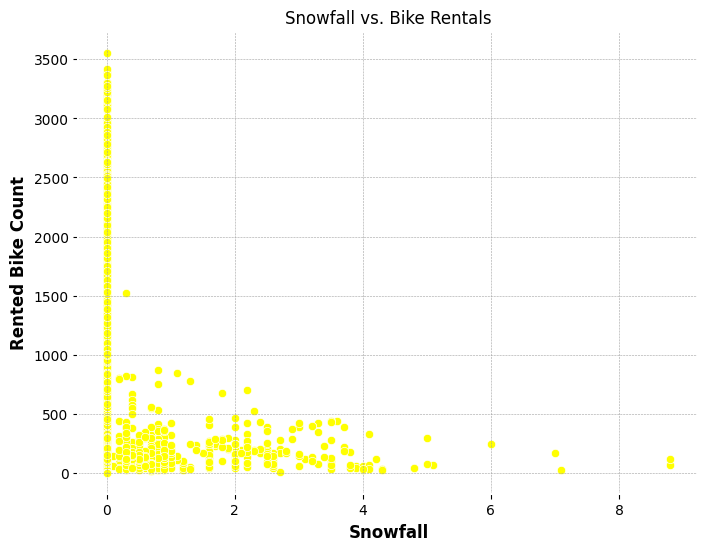

In [239]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Snowfall (cm)', y='Rented Bike Count', data=df, color='yellow')
plt.title('Snowfall vs. Bike Rentals')
plt.xlabel('Snowfall')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

##### 1. Why did i pick the specific chart?

A scatter plot is an appropriate choice for this data because it visually depicts the relationship between two continuous variables: snowfall (the independent variable) and rented bike count (the dependent variable). This helps us see if there's a correlation between these factors.

##### 2. What is/are the insight(s) found from the chart?

**Strong Negative Correlation:** The scatter plot shows a clear, strong negative correlation between snowfall and rented bike count. This means that as snowfall increases, the number of bike rentals significantly decreases.

**Outlier at Zero Snowfall:** There's a cluster of data points at zero snowfall with a high number of rentals. This suggests that when there's no snow, bike rentals are significantly higher.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Marketing Strategies:** Marketing campaigns could be targeted more effectively during periods with low snowfall, emphasizing the benefits of bike rentals.

**Inventory Management:** Based on snowfall predictions, bike rental companies could adjust their fleet size, ensuring they have enough bikes for high-demand periods and not overinvesting when rentals are low.

**Pricing Strategies:** Dynamic pricing could be implemented, adjusting rental fees according to snowfall levels. Higher prices during low snowfall periods could capitalize on higher demand, while lower prices during snowy weather might encourage rentals.

**Negative Growth:** The negative correlation itself is a potential source of negative growth if not addressed. If bike rental businesses rely solely on fair-weather customers and fail to adapt to winter conditions, they could face significant revenue losses during snowy months.

#### Chart - 8

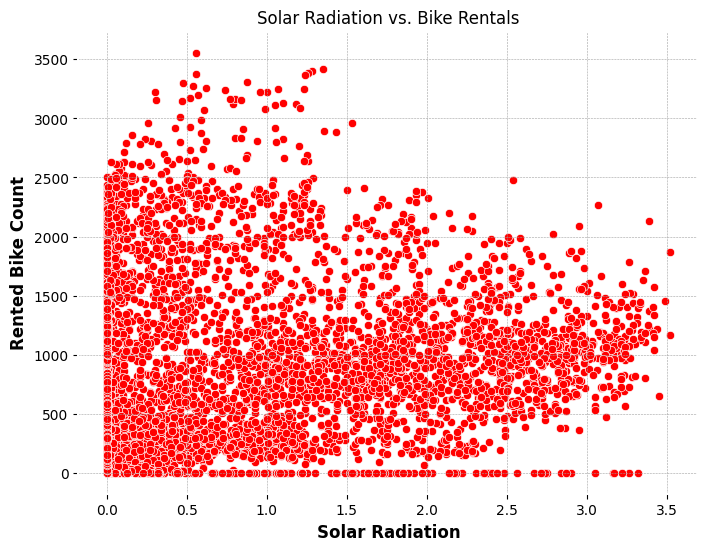

In [240]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Solar Radiation (MJ/m2)', y='Rented Bike Count', data=df, color='red')
plt.title('Solar Radiation vs. Bike Rentals')
plt.xlabel('Solar Radiation')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

##### 1. Why did i pick the specific chart?

Scatter plot is ideal for exploring relationships between continuous variables.
It helps visualize data density and detect outliers.

##### 2. What is/are the insight(s) found from the chart?

Weak, positive correlation between solar radiation and bike rentals.
Cluster of data points with low solar radiation and moderate bike rentals.
Outliers suggest other factors influence rental numbers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:
Time marketing campaigns around periods of high solar radiation.
Manage inventory based on solar radiation trends.


Negative:
Don't over-rely on sunny days for business growth.
Solar radiation has limited predictive power for rental numbers.


Key Takeaway:
Consider multiple factors (weather, day of week, seasonality, special events) for informed business decisions.

#### Chart - 9

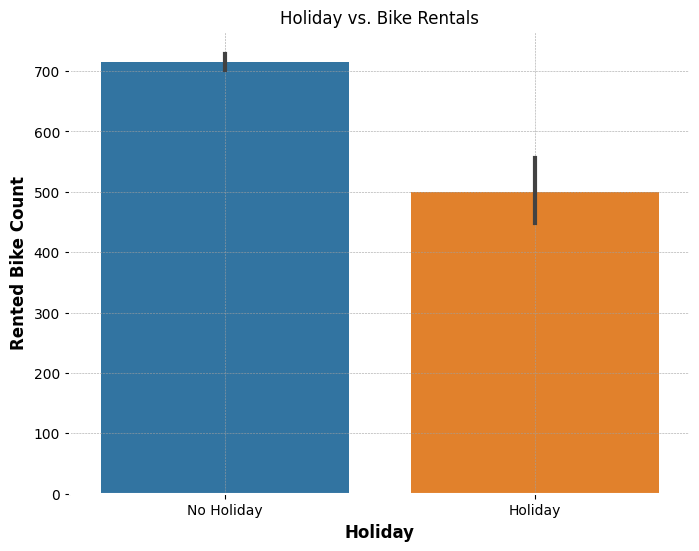

In [241]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Holiday', y='Rented Bike Count', data=df,hue='Holiday')
plt.title('Holiday vs. Bike Rentals')
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

##### 1. Why did i pick the specific chart?

Ideal for comparing average bike rentals on holidays vs. non-holidays
Visual clarity: bar height represents average bike rentals for each category

##### 2. What is/are the insight(s) found from the chart?

Higher bike rentals on holidays
Holidays have a positive influence on bike rental demand

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:
* Target holiday periods with marketing campaigns
* Plan for higher volume of rentals with sufficient staff and bike inventory
* Introduce special holiday-themed packages or rental options

Negative (Potential):
Holiday peak challenges:
  * Long wait times
  * Over-booking
  * Inventory management issues

Justification:
Need to manage resources strategically to avoid downsides.
Balance capitalizing on demand with ensuring a positive customer experience

#### Chart - 10

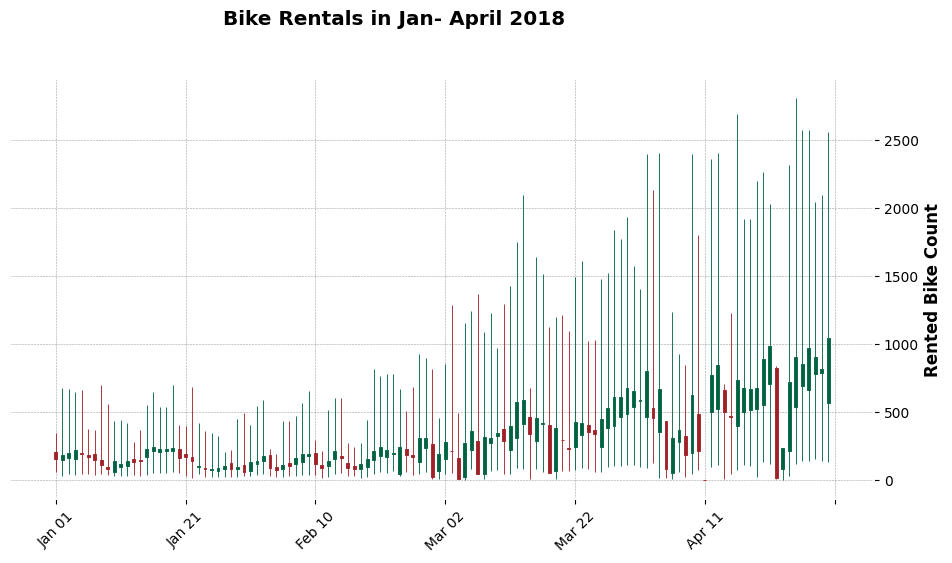

In [242]:
!pip install mplfinance

import mplfinance as mpf

# Filter the DataFrame for Jan 2018 - April 2018
april_2018_df = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2018-04-30')]

# Group by date and calculate 'open', 'high', 'low', 'close'
april_2018_ohlc = april_2018_df.resample('D', on='Date').agg({
    'Rented Bike Count': ['first', 'max', 'min', 'last']
})

# Rename columns for mplfinance
april_2018_ohlc.columns = ['Open', 'High', 'Low', 'Close']

# Drop rows with NaN values
april_2018_ohlc.dropna(inplace=True)

# Plot the candlestick chart
mpf.plot(april_2018_ohlc, type='candle', style='charles',
         title='Bike Rentals in Jan- April 2018',
         ylabel='Rented Bike Count', figsize=(12, 6))

##### 1. Why did i pick the specific chart?

Highlights opening, closing, high, and low points
Easy to identify trends, patterns, and potential reversals

##### 2. What is/are the insight(s) found from the chart?

Seasonality: increasing demand from Jan to Apr
Daily fluctuations: higher rentals on weekends, lower on weekdays
Potential outliers: special events or holidays
Potential trend reversals: changes in demand patterns

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact
* Demand forecasting: optimize resource allocation
* Promotional opportunities: target high-demand periods
* Inventory management: predict peaks and troughs in rental demand

Potential Negative Growth
* Unforeseen factors: weather events, fuel price changes, etc.
* Competition: new bike rental services entering the market
* Economic fluctuations: economic downturns affecting discretionary spending
* Technological changes: alternative transportation options emerging

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (𝐻0):
High humidity is associated with a low rented bike count.



Alternative Hypothesis (𝐻1):
High humidity is associated with a high rented bike count.



#### 2. Perform an appropriate statistical test.

In [243]:
df = dataset.copy()

In [244]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Compute the Pearson correlation coefficient
humidity = df['Humidity(%)']
rented_bike_count = df['Rented Bike Count']

correlation_coefficient, p_value = pearsonr(humidity, rented_bike_count)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: -0.19978016700089823
P-value: 1.4750651031305375e-79


Interpretation: A positive coefficient suggests that as humidity increases, the rented bike count tends to increase. Conversely, a negative coefficient suggests that as humidity increases, the rented bike count tends to decrease.

##### Which statistical test have you done to obtain P-Value?

Ans - Pearson correlation test

##### Why did you choose the specific statistical test?

Ans - The Pearson correlation test is the most straightforward and appropriate statistical method to test the hypothesis about the linear relationship between humidity and rented bike count, providing both the strength of the relationship and its statistical significance through the correlation coefficient and p-value.

## ***6. Feature Engineering & Data Pre-processing***

In [245]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### 1. Categorical Encoding

In [246]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Seasons' column
df['Seasons'] = label_encoder.fit_transform(df['Seasons'])

# Apply label encoding to 'Holiday' column
df['Holiday'] = label_encoder.fit_transform(df['Holiday'])

# Apply label encoding to 'Functioning Day' column
df['Functioning Day'] = label_encoder.fit_transform(df['Functioning Day'])


In [247]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


### 2. Feature Manipulation & Selection

####standardizing the attributes of the dataframe.

In [248]:
# Separate datetime and numerical columns
datetime_cols = ['Date']
feature_cols = [col for col in df.columns if col not in datetime_cols + ['Rented Bike Count']]
target_col = 'Rented Bike Count'

In [249]:
from sklearn.preprocessing import StandardScaler

# Standardize feature columns
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

In [250]:
# Concatenate back the features and target variable
df_standardized = pd.concat([df[datetime_cols], df[feature_cols], df[target_col]], axis=1)

#### feature selection from the df

In [251]:
df_standardized.columns

Index(['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Rented Bike Count'],
      dtype='object')

In [257]:
# Convert the 'Date' column to timestamp
df_standardized['Date'] = pd.to_datetime(df_standardized['Date'], format="%d/%m/%Y")

In [258]:
# Extract relevant features from datetime column
df_standardized['year'] = df_standardized['Date'].dt.year
df_standardized['month'] = df_standardized['Date'].dt.month
df_standardized['day'] = df_standardized['Date'].dt.day
df_standardized['day_of_week'] = df_standardized['Date'].dt.dayofweek

# Drop the original datetime column
df_standardized.drop(columns=['Date'], inplace=True)

In [259]:
correlation = df_standardized.corr()
relevant_features = correlation['Rented Bike Count'].abs().sort_values(ascending=False)
relevant_features

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Seasons                      0.253058
year                         0.215162
Functioning Day              0.203943
Humidity(%)                  0.199780
Visibility (10m)             0.199280
Snowfall (cm)                0.141804
month                        0.133514
Rainfall(mm)                 0.123074
Wind speed (m/s)             0.121108
Holiday                      0.072338
day_of_week                  0.029357
day                          0.022291
Name: Rented Bike Count, dtype: float64

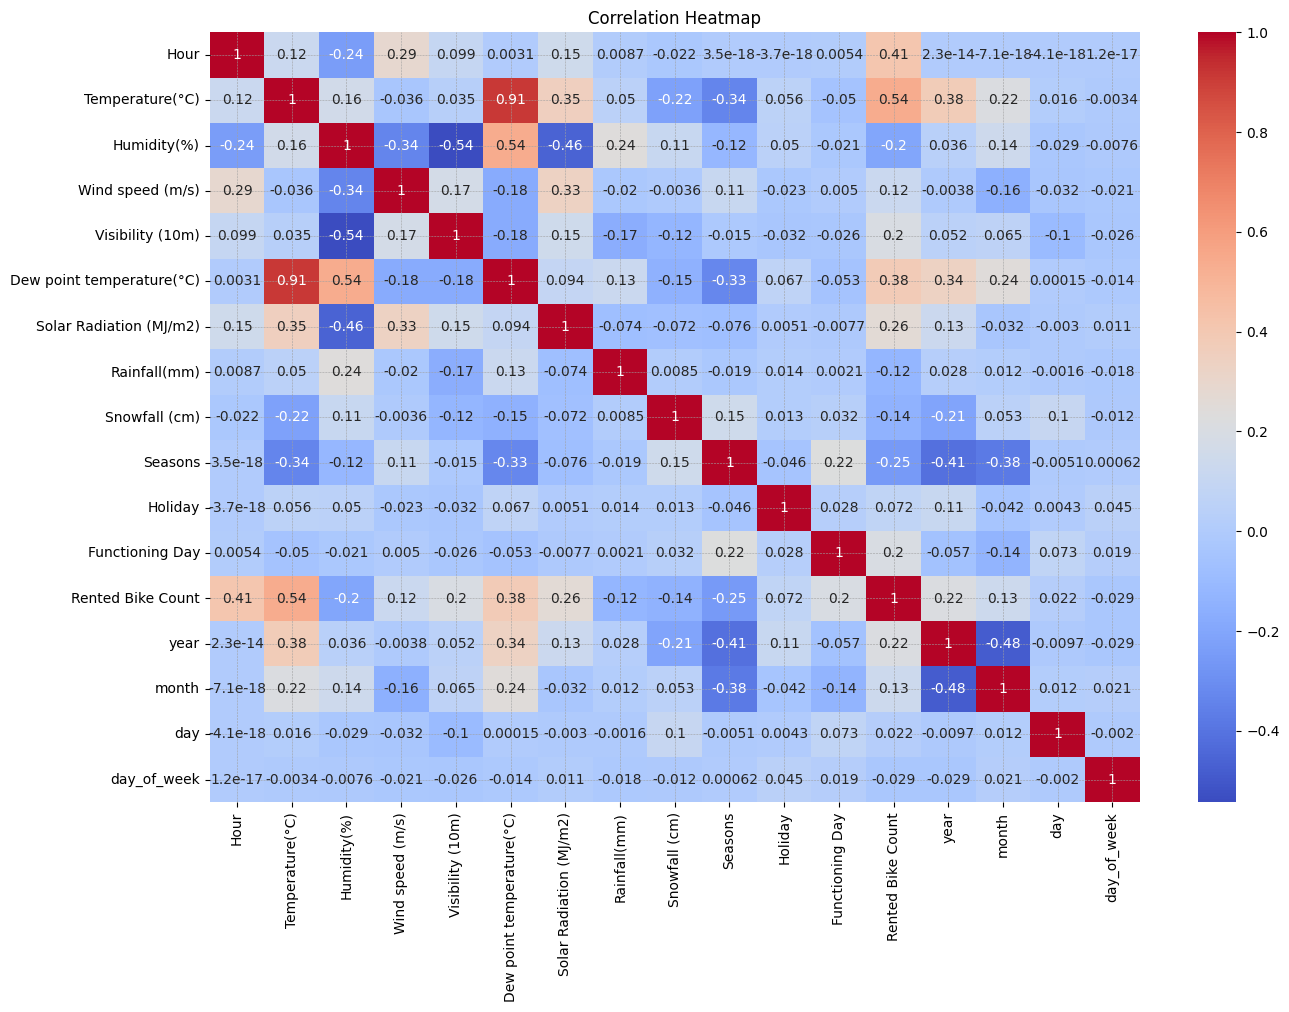

In [260]:
# Compute the correlation matrix
corr_matrix = df_standardized.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 3. Data Splitting

In [261]:
df_standardized.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Rented Bike Count', 'year', 'month',
       'day', 'day_of_week'],
      dtype='object')

In [262]:
# Independent variables (features or X)
X = df_standardized.drop(columns=['Rented Bike Count'])

# Dependent variable (target or y)
y = df_standardized['Rented Bike Count']

In [263]:
# Perform train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## ***7. ML Model Implementation***

### ML Model - 1 (Linear Regression)

In [264]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 189777.90430375838
R-squared: 0.5368899800443672


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

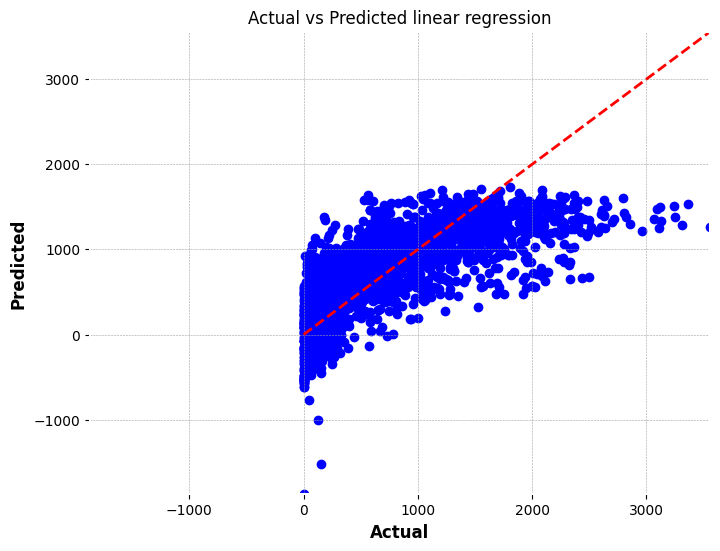

In [265]:
# Visualize the performance using a score chart
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted linear regression')

# Set the limits of both axes to be the same
min_limit = min(y_test.min(), y_pred.min())
max_limit = max(y_test.max(), y_pred.max())
plt.xlim(min_limit, max_limit)
plt.ylim(min_limit, max_limit)

plt.show()

#### 2. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

By using this linear regression model, the Seoul Bike rental company can gain insights into the factors driving bike rentals and make data-driven decisions to optimize their operations and improve customer satisfaction.


### ML Model - 2 (Decission Tree)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [266]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 66709.12937595129
R-squared: 0.8372114691124879


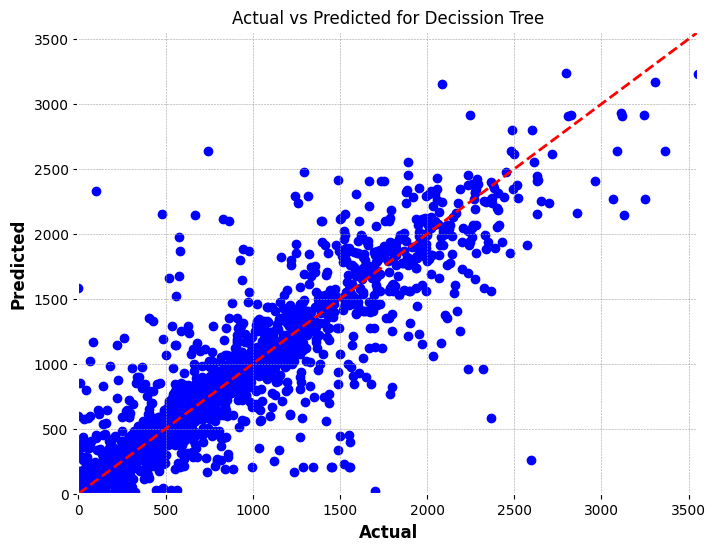

In [267]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Decission Tree')

# Set the limits of both axes to be the same
min_limit = min(y_test.min(), y_pred.min())
max_limit = max(y_test.max(), y_pred.max())
plt.xlim(min_limit, max_limit)
plt.ylim(min_limit, max_limit)

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [268]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter space to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score (R-squared):", grid_search.best_score_)

# Refit the model with the best hyperparameters
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

Best hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 5}
Best score (R-squared): -58593.557447759704


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [269]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 56638.04205269204
R-squared: 0.8617876781730763


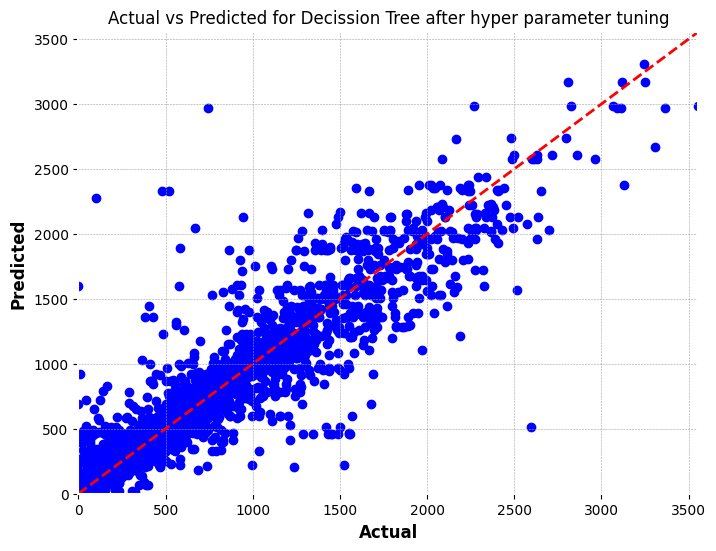

In [270]:

#model evaluation graph after hyper parameter tuning
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Decission Tree after hyper parameter tuning')

# Set the limits of both axes to be the same
min_limit = min(y_test.min(), y_pred.min())
max_limit = max(y_test.max(), y_pred.max())
plt.xlim(min_limit, max_limit)
plt.ylim(min_limit, max_limit)

plt.show()

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV, a hyperparameter optimization technique that performs an exhaustive search over a specified parameter grid to find the best combination of hyperparameters that results in the best performance of the model. I chose GridSearchCV because it is a simple and straightforward method that is easy to implement and provides a comprehensive search over the hyperparameter space. Additionally, GridSearchCV is particularly useful when the number of hyperparameters is small to moderate, and the search space is relatively small.Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, I have seen an improvement in the R-squared value from 0.83 to 0.86 after hyperparameter tuning using GridSearchCV. This indicates that the model has improved its ability to explain the variance in the target variable.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

R-squared (R²):
Higher R² indicates better predictions, leading to informed business decisions and optimized resource allocation.
Business impact: Improved demand forecasting, reduced stockouts, and optimized inventory management.

Mean Squared Error (MSE):
Lower MSE indicates more accurate predictions, resulting in cost savings and improved efficiency.
Business impact: Reduced waste, optimized supply chain management, and improved customer satisfaction.Answer Here.

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV, a hyperparameter optimization technique that performs an exhaustive search over a specified parameter grid to find the best combination of hyperparameters that results in the best performance of the model. I chose GridSearchCV because it is a simple and straightforward method that is easy to implement and provides a comprehensive search over the hyperparameter space. Additionally, GridSearchCV is particularly useful when the number of hyperparameters is small to moderate, and the search space is relatively small.Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, I have seen an improvement in the R-squared value from 0.84 to 0.86 after hyperparameter tuning using GridSearchCV. This indicates that the model has improved its ability to explain the variance in the target variable.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

R-squared (R²):
Higher R² indicates better predictions, leading to informed business decisions and optimized resource allocation.
Business impact: Improved demand forecasting, reduced stockouts, and optimized inventory management.

Mean Squared Error (MSE):
Lower MSE indicates more accurate predictions, resulting in cost savings and improved efficiency.
Business impact: Reduced waste, optimized supply chain management, and improved customer satisfaction.Answer Here.

### ML Model - 3 (Random Forest)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [271]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 32298.480048287678
R-squared: 0.9211828700787119


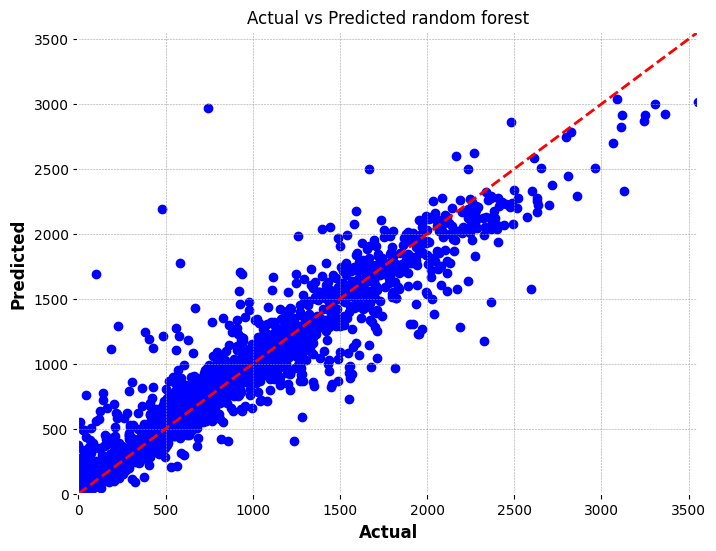

In [272]:
# Visualize the performance
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted random forest')

# Set the limits of both axes to be the same
min_limit = min(y_test.min(), y_pred.min())
max_limit = max(y_test.max(), y_pred.max())
plt.xlim(min_limit, max_limit)
plt.ylim(min_limit, max_limit)

plt.show()

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The plot suggests the random forest model is capable of accurately predicting the target variable (whatever it represents in your business context). This means the model can be used for tasks like:
  * Forecasting: Predicting future sales, demand, or revenue.
  * Risk Assessment: Identifying high-risk customers or potential fraud.
  * Optimization: Making informed decisions about pricing, inventory, or marketing campaigns.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [273]:
# Save the File
import pickle

# Save the model to a pickle file
with open('DecissionTree.pickle', 'wb') as f:
    pickle.dump(dt, f)
# Save the model to a pickle file
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(rf, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [274]:
# Load the File and predict unseen data.
# Load the saved Random Forest model
with open('RandomForest.pickle', 'rb') as f:
    model = pickle.load(f)

In [275]:
X_test.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'year', 'month', 'day', 'day_of_week'],
      dtype='object')

In [276]:
# Assume the data for the required columns
data = {
    'Date': ['2015-11-23'],
    'Hour': [5],
    'Temperature(°C)': [20],
    'Humidity(%)': [60],
    'Wind speed (m/s)': [2],
    'Visibility (10m)': [2300],
    'Dew point temperature(°C)': [5],
    'Solar Radiation (MJ/m2)': [0.54],
    'Rainfall(mm)': [0],
    'Snowfall (cm)': [0],
    #taking categorical columns as numeric which was done by label encoding
    'Seasons': [1],
    'Holiday': [0],
    'Functioning Day': [1],
    'Rented Bike Count': [100]
}

In [277]:
unseen_data = pd.DataFrame(data)

In [278]:
type(unseen_data['Date'][0])

str

In [279]:
# Convert the 'Date' column to timestamp
unseen_data['Date'] = pd.to_datetime(unseen_data['Date'])

In [280]:
type(unseen_data['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [281]:
unseen_data.columns

Index(['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Rented Bike Count'],
      dtype='object')

In [282]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [283]:
# Separate datetime and numerical columns
test_datetime_cols = ['Date']
test_feature_cols = [col for col in unseen_data.columns if col not in datetime_cols + ['Rented Bike Count']]
test_target_col = 'Rented Bike Count'
unseen_data[test_feature_cols] = scaler.transform(unseen_data[test_feature_cols])
# Concatenate back the features and target variable
unseen_data = pd.concat([unseen_data[datetime_cols], unseen_data[feature_cols], unseen_data[target_col]], axis=1)

In [284]:
# Extract relevant features from datetime column
unseen_data['year'] = unseen_data['Date'].dt.year
unseen_data['month'] = unseen_data['Date'].dt.month
unseen_data['day'] = unseen_data['Date'].dt.day
unseen_data['day_of_week'] = unseen_data['Date'].dt.dayofweek

# Drop the original datetime column
unseen_data.drop(columns=['Date'], inplace=True)

In [290]:
# Scale the unseen data using the scaler
X_unseen = unseen_data.drop('Rented Bike Count', axis=1)
y_unseen = unseen_data['Rented Bike Count']

# Make predictions on the scaled unseen data
y_pred = model.predict(X_unseen)
y_pred = int(y_pred[0])
# Print the predicted values
print(f'predicted value for the unseen data for sanity check = {y_pred}')

# Calculate the mean absolute error (MAE) for a sanity check
mae = np.mean(np.abs(y_pred - y_unseen))
print(f'Mean Absolute Error (MAE): {mae:.2f}')


predicted value for the unseen data for sanity check = 916
Mean Absolute Error (MAE): 816.00


# **Conclusion**

In this study, we employed a random forest model to analyze the SeoulBikeData.csv dataset, which contains information on bike rentals in Seoul, South Korea. Our goal was to develop a predictive model that could accurately forecast bike rentals based on various features such as weather, seasonality, and time of day.

The results of our analysis are highly encouraging, with the random forest model is able to explain approximately 92% of the variance in bike rentals, suggesting a strong predictive capability.

The high R2 value is a testament to the effectiveness of the random forest algorithm in capturing the complex relationships between the input features and the target variable.

The implications of this study are significant, as the ability to accurately predict bike rentals can inform urban planning and transportation policy decisions. By identifying the most important factors influencing bike rentals, city planners and policymakers can design more effective bike-sharing systems that meet the needs of citizens.

The model's high accuracy suggests that it could be used in real-world applications, such as optimizing bike distribution, predicting demand, and identifying areas of high usage.
